# Dataset Link
# https://www.kaggle.com/zalando-research/fashionmnist

In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install kaggle


In [0]:
!mkdir .kaggle


You can use your own user own and key via uploading a kaggle.json file

In [0]:
import json
token = {"username":"********","key":"*******************************"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/root/.kaggle/kaggle.json


cp: cannot create regular file '/root/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


Downloading a dataset 

In [0]:
!kaggle datasets download -d zalando-research/fashionmnist -p /content


 95% 65.0M/68.8M [00:02<00:00, 23.2MB/s]
100% 68.8M/68.8M [00:02<00:00, 34.0MB/s]


In [0]:
!unzip \*.zip


Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [0]:
# Import libraries
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split



Using TensorFlow backend.


In [0]:
import pandas as pd
# Load training and test data into dataframes
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [0]:
data_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np
# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))


In [0]:
# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)


In [0]:
print(np.shape(X_train))
np.shape(X_val)

(48000, 784)


(12000, 784)

In [0]:
# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [0]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [0]:
# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
import keras as k
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

cnn3.compile(loss=k.losses.categorical_crossentropy,
             optimizer=sgd,
              metrics=['accuracy'])

In [0]:
# batch size 256 and no optimizer , constant learning rate
history = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 8s 171us/step - loss: 1.4497 - acc: 0.4611 - val_loss: 0.7702 - val_acc: 0.7196
Epoch 2/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.7733 - acc: 0.7070 - val_loss: 0.6270 - val_acc: 0.7588
Epoch 3/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.6674 - acc: 0.7455 - val_loss: 0.5617 - val_acc: 0.7857
Epoch 4/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.6122 - acc: 0.7675 - val_loss: 0.5238 - val_acc: 0.8038
Epoch 5/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.5729 - acc: 0.7839 - val_loss: 0.4923 - val_acc: 0.8135
Epoch 6/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.5429 - acc: 0.7933 - val_loss: 0.4692 - val_acc: 0.8271
Epoch 7/10
48000/48000 [=

In [0]:
import keras as k
cnn3.compile(loss=k.losses.categorical_crossentropy,
              optimizer=k.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
cnn3.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

# Batch Size 256

In [0]:
historyA = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.4540 - acc: 0.8331 - val_loss: 0.3670 - val_acc: 0.8636
Epoch 2/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.4068 - acc: 0.8483 - val_loss: 0.3361 - val_acc: 0.8757
Epoch 3/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.3748 - acc: 0.8607 - val_loss: 0.3206 - val_acc: 0.8804
Epoch 4/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.3480 - acc: 0.8737 - val_loss: 0.3008 - val_acc: 0.8903
Epoch 5/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.3318 - acc: 0.8785 - val_loss: 0.2976 - val_acc: 0.8896
Epoch 6/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.3185 - acc: 0.8839 - val_loss: 0.2796 - val_acc: 0.8957
Epoch 7/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.3029 - acc: 0.8900 - val_loss: 0.2750 - val_acc

##With batch size 256 , accuracy is 90%

# Batch Size 2048

In [0]:
historyB = cnn3.fit(X_train, y_train,
          batch_size=2048,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 23us/step - loss: 0.2662 - acc: 0.9026 - val_loss: 0.2487 - val_acc: 0.9056
Epoch 2/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.2567 - acc: 0.9044 - val_loss: 0.2460 - val_acc: 0.9074
Epoch 3/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.2540 - acc: 0.9058 - val_loss: 0.2433 - val_acc: 0.9077
Epoch 4/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.2524 - acc: 0.9074 - val_loss: 0.2431 - val_acc: 0.9076
Epoch 5/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.2494 - acc: 0.9074 - val_loss: 0.2422 - val_acc: 0.9084
Epoch 6/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.2467 - acc: 0.9074 - val_loss: 0.2409 - val_acc: 0.9091
Epoch 7/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.2452 - acc: 0.9088 - val_loss: 0.2408 - val_acc

## Batch size 2048, accuracy is 91% . It's mean don't decay a learning rate increase a batch size

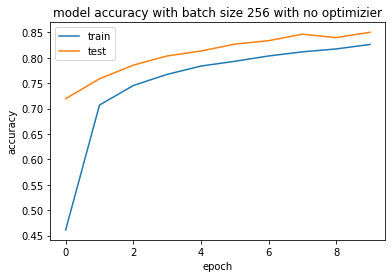

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy with batch size 256 with no optimizier')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

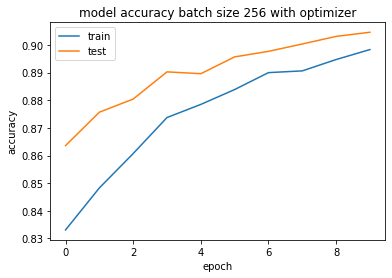

In [0]:
import matplotlib.pyplot as plt

plt.plot(historyA.history['acc'])
plt.plot(historyA.history['val_acc'])
plt.title('model accuracy batch size 256 with optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

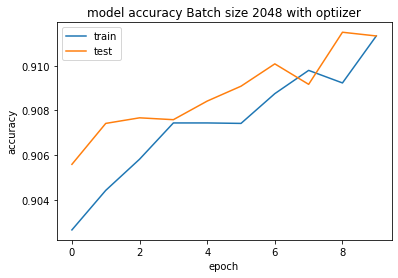

In [0]:
import matplotlib.pyplot as plt

plt.plot(historyB.history['acc'])
plt.plot(historyB.history['val_acc'])
plt.title('model accuracy Batch size 2048 with optiizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()